In [4]:
import pandas as pd
import numpy as np

stop_stature = pd.read_csv('track_points.csv')

db = points.loc[:, ['X', 'Y', 'ele']]
# X = longitude
# Y = latitude
db.head()

NameError: name 'points' is not defined

In [6]:
db.shape

(54, 3)

In [7]:
from math import sin, cos, sqrt, degrees, radians, asin, acos

#earth radius (mi)
r = 3958.8

#distance from point to point
pp_distance = []

#inverse haversine
for a in range (0,db.shape[0]-1):
    lat1 = radians(db.loc[a]['Y'])
    lat2 = radians(db.loc[a+1]['Y'])
    long1 = radians(db.loc[a]['X'])
    long2 = radians(db.loc[a+1]['X'])
    urad1 = sin((lat2-lat1)/2)**2
    urad2 = cos(lat1) * cos(lat2) * sin((long2-long1)/2)**2
    dis = 2 * r * asin(sqrt(urad1 + urad2))
    pp_distance.append(dis)

#point to point distance dataframe
point_distance = pd.DataFrame(pp_distance)
point_distance.columns = ['d']
point_distance.head()

,d
0,0.000620
1,0.000883
2,0.002011
3,0.006171
4,0.020349


In [8]:
#distance from start
dorstance = []
dorstance.append(point_distance.loc[0]['d'])
dorstance.append(point_distance.loc[0]['d'] + point_distance.loc[1]['d'])
for a in range (2,db.shape[0]-1):
    dorstance.append(dorstance[a-1] + point_distance.loc[a]['d'])
distance = pd.DataFrame(dorstance)
distance.columns = ['distance']

In [9]:
eleva=[]
for a in range (0, db.shape[0]-1):
    ele1 = db.loc[a]['ele']
    ele2 = db.loc[a+1]['ele']
    avg = (ele1 + ele2) / 2
    eleva.append(avg)
elevation = pd.DataFrame(eleva)
elevation.columns = ['elevation']
#elevation
elevation.head()

,elevation
0,135.05
1,134.95
2,134.55
3,134.05
4,133.85


In [12]:
#combined elevation and distance
combined = pd.merge(elevation, distance, on=distance.index)
total = combined.loc[:, ['elevation', 'distance']]
total.head()

,elevation,distance
0,135.05,0.000620
1,134.95,0.001503
2,134.55,0.003514
3,134.05,0.009685
4,133.85,0.030034


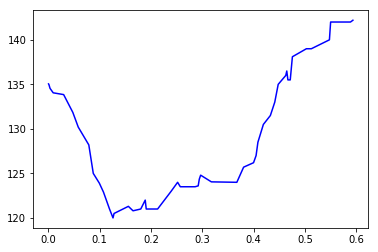

In [13]:
#plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(total['distance'], total['elevation'],'b-')
plt.show()

In [14]:
dist = distance.values.reshape(-1,)
elv = elevation.values

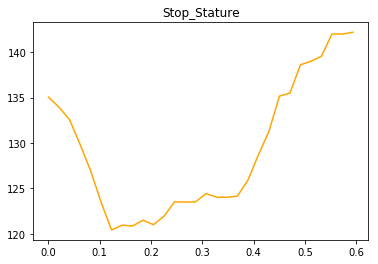

In [53]:
from scipy.interpolate import make_interp_spline, BSpline
phi = np.linspace(0, 2.*np.pi, 40)
xnew = np.linspace(dist.min(),dist.max(),30) #300 represents number of points to make between T.min and T.max
spl = make_interp_spline(dist, elv, k=1) #BSpline object
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth, color = 'orange')
plt.title('Stop_Stature')
plt.show()

In [31]:
xnew

array([0.00062022, 0.02107013, 0.04152005, 0.06196997, 0.08241988,
       0.1028698 , 0.12331971, 0.14376963, 0.16421955, 0.18466946,
       0.20511938, 0.22556929, 0.24601921, 0.26646912, 0.28691904,
       0.30736896, 0.32781887, 0.34826879, 0.3687187 , 0.38916862,
       0.40961854, 0.43006845, 0.45051837, 0.47096828, 0.4914182 ,
       0.51186812, 0.53231803, 0.55276795, 0.57321786, 0.59366778])

In [1]:
ynew = power_smooth.ravel()

NameError: name 'power_smooth' is not defined

In [2]:
ynew_mile = ynew * 0.00018939

NameError: name 'ynew' is not defined

In [33]:
def energy (speed = 1, gradient):
    return 1.44 + 1.94*speed**0.43 + 0.24*speed**4 + 0.34*speed*gradient*(1-1.05**(1-1.11**(gradient+32)))